In [1]:
import numpy as np
import matplotlib.pyplot as plt
import astropy.io.fits as fits
import os
import glob
from astropy.table import Table
from astropy.io import ascii
from astropy.convolution import convolve, Box1DKernel
from scipy.interpolate import interp1d

import astropy.units as u
from astropy import time, coordinates as coord
import astropy.constants as const
from astropy.modeling import models, fitting
from matplotlib.gridspec import GridSpec


#matplotlib set up
%matplotlib inline
from matplotlib import rcParams
rcParams["figure.figsize"] = (14, 5)
rcParams["font.size"] = 20

In [2]:
path = '/media/david/2tb_ext_hd/hddata/meats/hst/toi-421/'
x1ds = np.hstack((glob.glob('{}*oeoo*x1d.fits'.format(path)), glob.glob('{}*sx1.fits'.format(path))))
x1ds

array(['/media/david/2tb_ext_hd/hddata/meats/hst/toi-421/oeoo24010_x1d.fits',
       '/media/david/2tb_ext_hd/hddata/meats/hst/toi-421/oeoo24020_x1d.fits',
       '/media/david/2tb_ext_hd/hddata/meats/hst/toi-421/oeoo24030_x1d.fits',
       '/media/david/2tb_ext_hd/hddata/meats/hst/toi-421/oeoo24040_x1d.fits',
       '/media/david/2tb_ext_hd/hddata/meats/hst/toi-421/oeoo24050_sx1.fits'],
      dtype='<U67')

/media/david/2tb_ext_hd/hddata/meats/hst/toi-421/oeoo24010_x1d.fits
G140L
[513.2145]


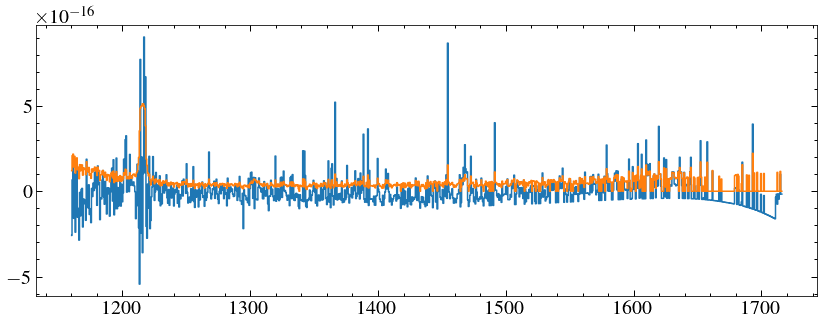

/media/david/2tb_ext_hd/hddata/meats/hst/toi-421/oeoo24020_x1d.fits
G140L
[512.62335]


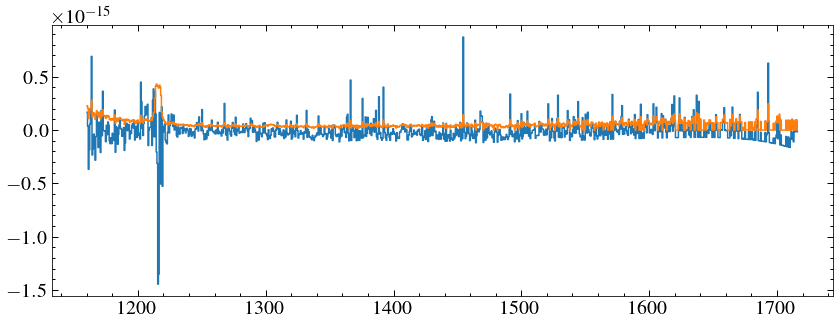

/media/david/2tb_ext_hd/hddata/meats/hst/toi-421/oeoo24030_x1d.fits
G140L
[512.64307]


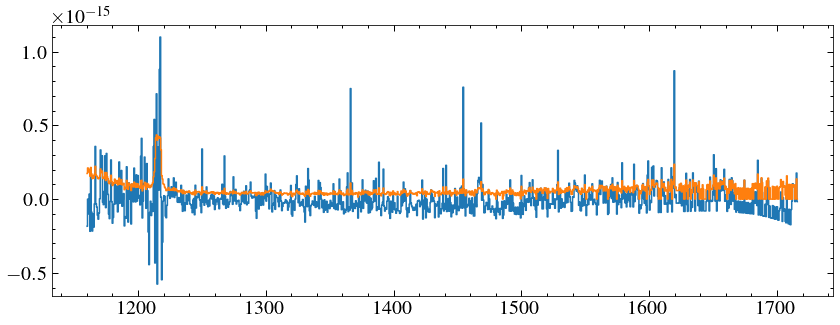

/media/david/2tb_ext_hd/hddata/meats/hst/toi-421/oeoo24040_x1d.fits
G230L
[492.99686]


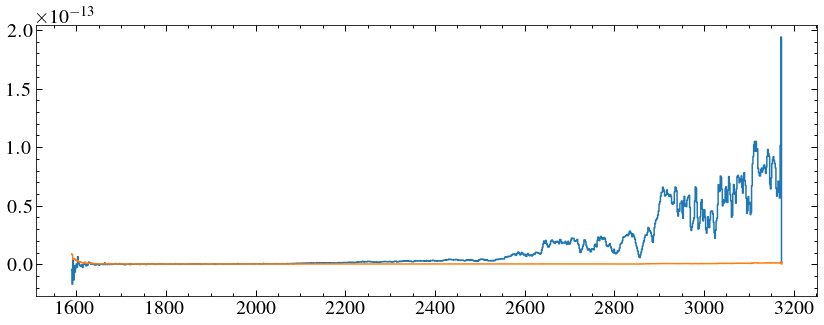

/media/david/2tb_ext_hd/hddata/meats/hst/toi-421/oeoo24050_sx1.fits
G430L
[894.11395]


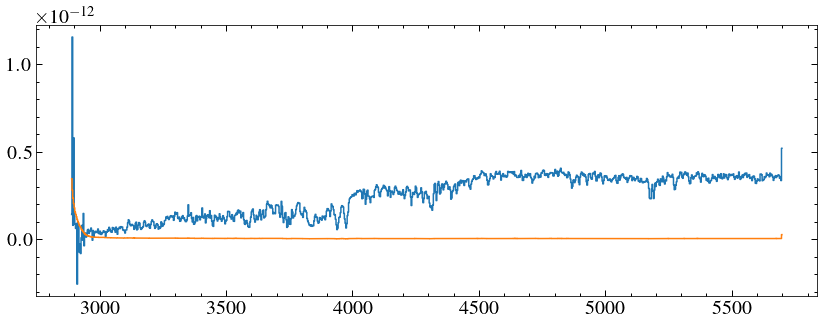

In [5]:
for x in x1ds:
    print(x)
    print(fits.getheader(x, 0)['OPT_ELEM'])
    data = fits.getdata(x, 1)
    print(data['A2Center'])
    w, f, e= data['WAVELENGTH'], data['FLUX'], data['ERROR']
    mask = w > 1160
    w, f, e = w[mask], f[mask], e[mask]
    plt.step(w, f, where='mid', c='C0')
    plt.step(w, e, where='mid', c='C1')
    plt.show()

    

/media/david/2tb_ext_hd/hddata/meats/hst/toi-421/oeoo24040_x1d.fits
G230L
[492.99686]
/media/david/2tb_ext_hd/hddata/meats/hst/toi-421/oeoo24050_sx1.fits
G430L
[894.11395]


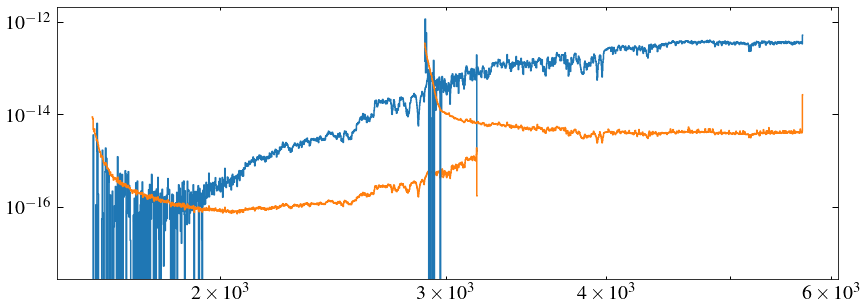

In [10]:
for x in x1ds[3:]:
    print(x)
    print(fits.getheader(x, 0)['OPT_ELEM'])
    data = fits.getdata(x, 1)
    print(data['A2Center'])
    w, f, e= data['WAVELENGTH'], data['FLUX'], data['ERROR']
    mask = w > 1160
    w, f, e = w[mask], f[mask], e[mask]
    plt.step(w, f, where='mid', c='C0')
    plt.step(w, e, where='mid', c='C1')


plt.yscale('log')
plt.xscale('log')

plt.show()





In [14]:
flts = glob.glob('{}*flt.fits'.format(path))
flts

['/media/david/2tb_ext_hd/hddata/meats/hst/toi-421/oeoo24010_flt.fits',
 '/media/david/2tb_ext_hd/hddata/meats/hst/toi-421/oeoo24020_flt.fits',
 '/media/david/2tb_ext_hd/hddata/meats/hst/toi-421/oeoo24030_flt.fits',
 '/media/david/2tb_ext_hd/hddata/meats/hst/toi-421/oeoo24040_flt.fits',
 '/media/david/2tb_ext_hd/hddata/meats/hst/toi-421/oeoo24050_flt.fits']

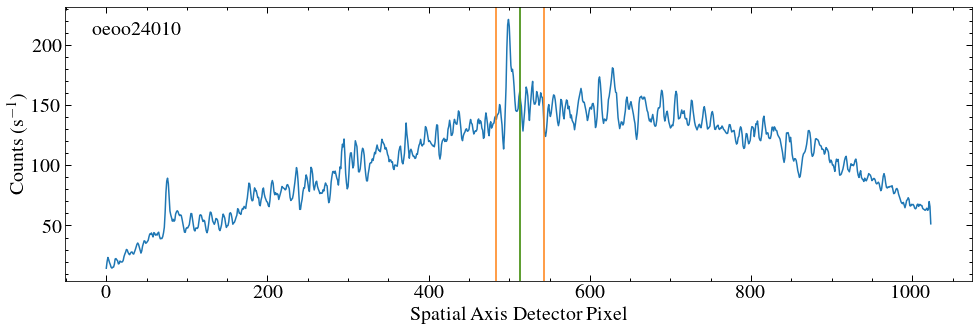

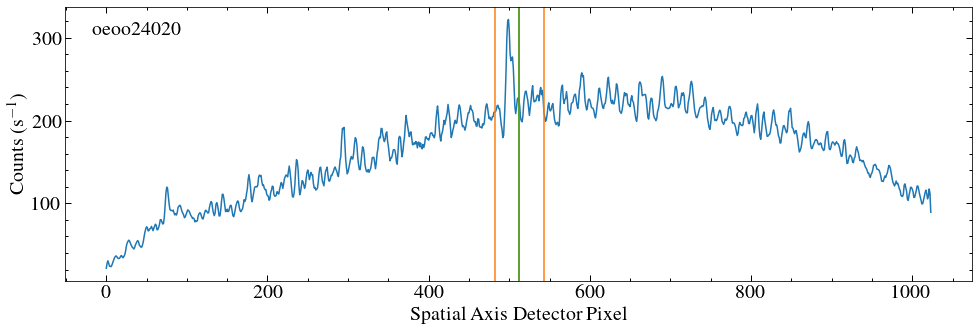

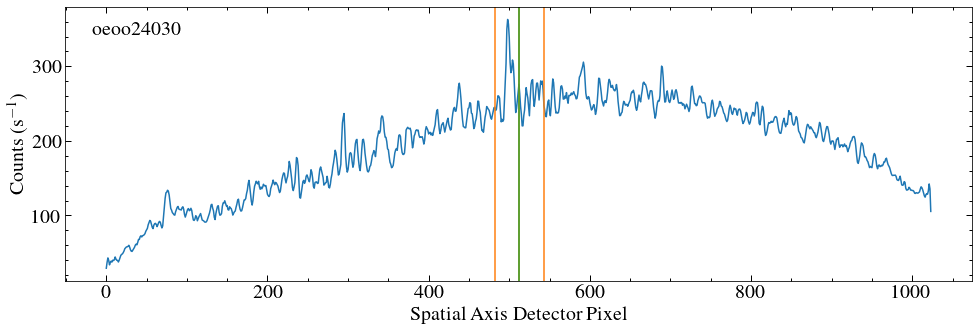

In [24]:
checkrow = 200
for flt in flts:
    hdr = fits.getheader(flt, 0)
    grating, root = hdr['OPT_ELEM'], hdr['ROOTNAME']
    if grating == 'G140L':        
        data = fits.getdata(flt, 1)
        data = np.transpose(data) #flip the image to make the next row more simple
        data = data[350:800]
        data = np.sum(data, axis=0)
        data = convolve(data,  Box1DKernel(4))
        plt.plot(np.arange(len(data)), data)
        
        spec = fits.getdata('{}{}_x1d.fits'.format(path, root))[0]
        [plt.axvline(line, c='C1') for line in (spec['A2CENTER'], spec['A2CENTER']+spec['BK1OFFST'], spec['A2CENTER']+spec['BK2OFFST'])]
        plt.axvline(spec['A2CENTER'], c='C2')      
        plt.ylabel('Counts (s$^{-1}$)')
        plt.xlabel('Spatial Axis Detector Pixel')
        plt.annotate('{}'.format(root), (0.03, 0.95), xycoords='axes fraction', ha='left', va='top')
        plt.tight_layout()
        plt.show()